In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse

In [2]:
a = 1
b = 2
n = 100 # x0 x1 .... xn xn+1
xfull = np.linspace(a, b, n+2)
x = xfull[1:-1]
h = x[1]-x[0]

assert np.abs(h - (b-a)/(n+1)) < 1e-15

def q(x):
    return 2/x**2

def p(x):
    return -2/x

def r(x):
    return np.sin(np.log(x))/x**2

alpha = 1
beta = 2

In [3]:
d0  =  2 + h**2  * q(x)
dp1 = -1 + (h/2) * p(x[:-1])
dm1 = -1 - (h/2) * p(x[1:])

A = sparse.diags_array([d0, dp1, dm1], offsets=[0, 1, -1])
b = -h**2 * r(x)
b[0]  += (1 + (h/2) * p(x[0])) * alpha
b[-1] += (1 - (h/2) * p(x[-1])) * beta

In [ ]:
"""
Examples
--------
>>> from scipy.sparse import diags_array
>>> diagonals = [[1, 2, 3, 4], [1, 2, 3], [1, 2]]
>>> diags_array(diagonals, offsets=[0, -1, 2]).toarray()
array([[1., 0., 1., 0.],
       [1., 2., 0., 2.],
       [0., 2., 3., 0.],
       [0., 0., 3., 4.]])
"""

In [4]:
y = sparse.linalg.spsolve(A, b)

/var/folders/pt/4ltmfkxs3b3309d718j9_r4m0000gn/T/ipykernel_46073/803059282.py:1: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  y = sparse.linalg.spsolve(A, b)


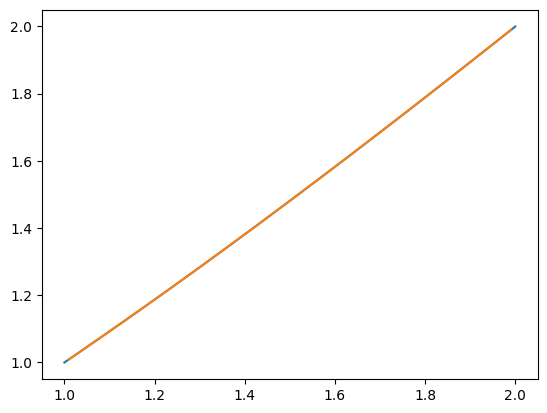

In [5]:
yfull = np.zeros_like(xfull)
yfull[1:-1] = y
yfull[0] = alpha
yfull[-1] = beta
plt.plot(xfull, yfull)

c2 = (1/70) * (8 - 12 * np.sin(np.log(2)) - 4 * np.cos(np.log(2)))
c1 = (11/10) - c2
yexact = c1*x + c2/x**2 - (3/10)*np.sin(np.log(x)) - (1/10)*np.cos(np.log(x))
plt.plot(x, yexact)